In [59]:
from sklearn.decomposition import FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.decomposition import FactorAnalysis as FA

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style
from time import time
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [60]:
# define the size of the outout graph in later
size = (10, 6)
data_set = pd.read_csv('winequality-red.csv',sep=';')
X = data_set.iloc[:, 0:11]
y = data_set.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(X)
data_scaled = scaler.transform(X)
X = pd.DataFrame(data=data_scaled, columns=X.columns)
nums = range(1, len(X.columns)+1)


# PCA

In [61]:
name = 'PCA'
specific_metric = "Explained variance"
pca = PCA(len(X.columns))
t0 = time()
pca.fit(X)
fit_time = time() - t0
print(fit_time)
data = pca.transform(X)
ev = pca.explained_variance_
components = pca.components_

0.002000570297241211


In [62]:
losses_PCA = []
for i in range(1, len(X.columns)+1):
    pca = PCA(i)
    pca.fit(X)
    projected = pca.transform(X)
    X_reconstructed = pca.inverse_transform(projected)
    loss = np.sum((X - X_reconstructed) ** 2, axis=1).mean()
    losses_PCA.append(loss)

In [86]:
losses_PCA

[7.900867559330086,
 5.974957869727647,
 4.4244143809529195,
 3.2111818503745964,
 2.251889779028609,
 1.5922815141591986,
 1.0084902949665315,
 0.5855335953085512,
 0.24089147848979492,
 0.05955831192188936,
 1.1128926406629543e-29]

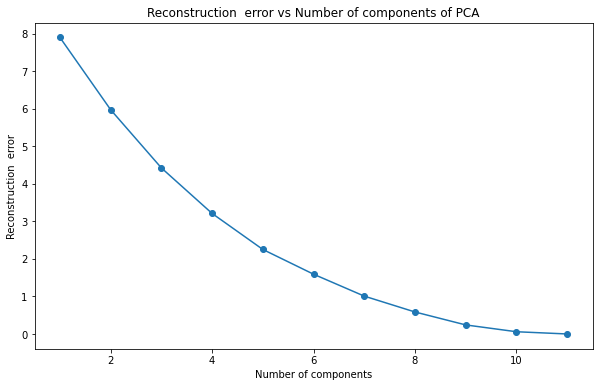

In [63]:
# ev
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Reconstruction  error vs Number of components of " + name)
g.set_ylabel('Reconstruction  error')
g.set_xlabel('Number of components')
g.plot(nums, losses_PCA, marker='o')
# g.legend(shadow=True, fancybox=True)

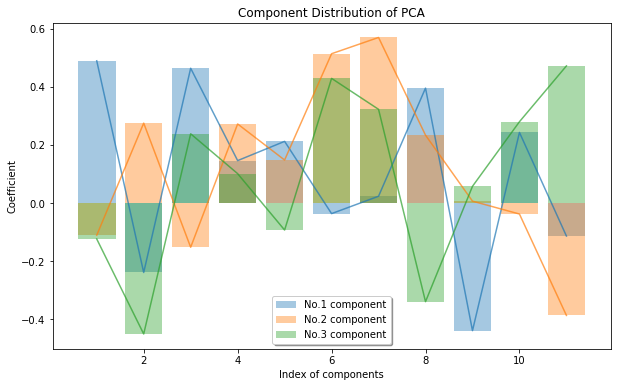

In [64]:
# components_
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Component Distribution of " + name)
g.set_ylabel('Coefficient')
g.set_xlabel('Index of components')
for i in range(3):
    g.bar(nums, components[i, :], label= "No." + str(i+1) + " component", alpha=0.4)
    g.plot(nums, components[i, :], alpha=0.7)
    g.legend(shadow=True, fancybox=True)

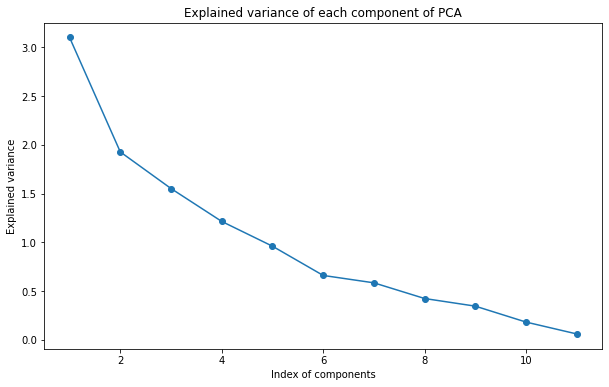

In [65]:
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title(specific_metric + " of each component of " + name)
g.set_ylabel(specific_metric)
g.set_xlabel('Index of components')
g.plot(nums, ev, marker='o')

# ICA

In [66]:
name = 'ICA'
specific_metric = "Kurtosis"
losses_ICA = []
metr = []
times_ICA = []
kurtosises_avg_ICA = []
kurtosises_peak_ICA = []
tmps_ICA = []
for i in range(1, len(X.columns)+1):
    ica = ICA(i)
    t0 = time()
    ica.fit(X)
    fit_time = time() - t0
    times_ICA.append(fit_time)
    projected = ica.transform(X)
    X_reconstructed = ica.inverse_transform(projected)
    loss_ICA = np.sum((X - X_reconstructed) ** 2, axis=1).mean()
    losses_ICA.append(loss_ICA)

    kurtosises_tmp = pd.DataFrame(projected).kurt()
    tmps_ICA.append(kurtosises_tmp)
    kurtosises_avg_ICA.append(kurtosises_tmp.mean())
    kurtosises_peak_ICA.append(kurtosises_tmp.max())

In [87]:
losses_ICA

[7.900867559330087,
 5.97495786972765,
 4.424414380952919,
 3.2111818503745964,
 2.25188977902861,
 1.592281514159199,
 1.0084902949665313,
 0.5855335953085518,
 0.24089147848979514,
 0.05955831192188939,
 1.0947898945581616e-29]

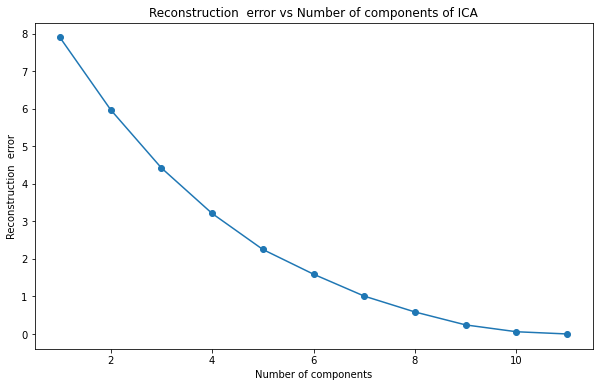

In [67]:
# recon error
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Reconstruction  error vs Number of components of " + name)
g.set_ylabel('Reconstruction  error')
g.set_xlabel('Number of components')
g.plot(nums, losses_ICA, marker='o')

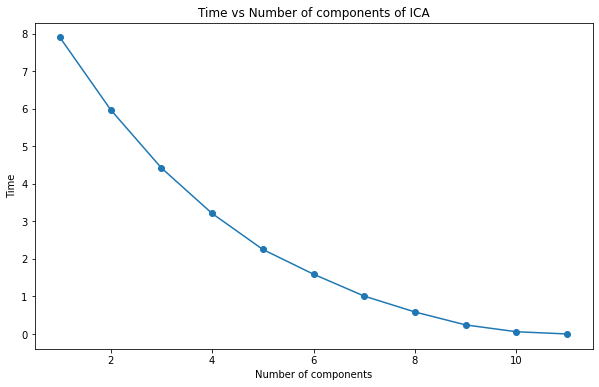

In [68]:
# time
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Time vs Number of components of " + name)
g.set_ylabel('Time')
g.set_xlabel('Number of components')
g.plot(nums, losses_ICA, marker='o')

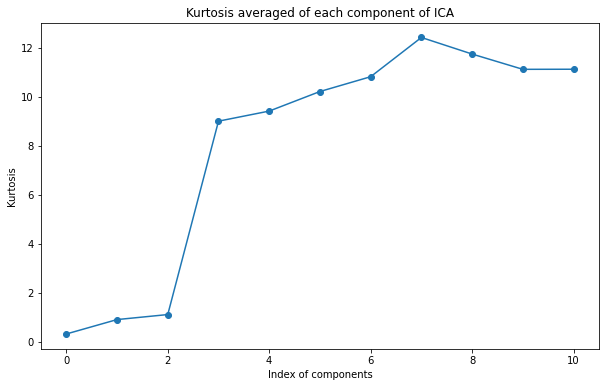

In [69]:
# avg kurtosis
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title(specific_metric + " averaged of each component of " + name)
g.set_ylabel(specific_metric)
g.set_xlabel('Index of components')
g.plot(kurtosises_avg_ICA, marker='o')
# g.legend(shadow=True, fancybox=True)

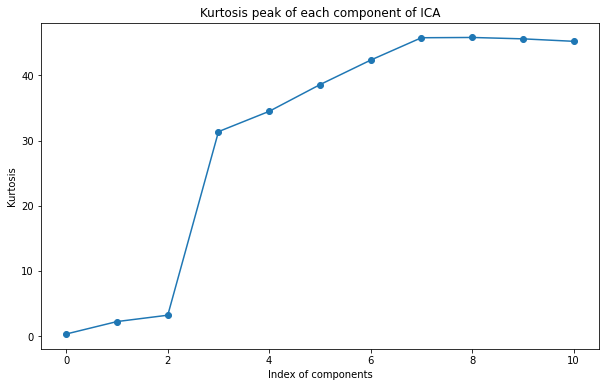

In [70]:
# rush kurtosis
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title(specific_metric + " peak of each component of " + name)
g.set_ylabel(specific_metric)
g.set_xlabel('Index of components')
g.plot(kurtosises_peak_ICA, marker='o')


In [71]:
best_n = 6
nums_ = range(1, len(X.columns)+1)
ica = ICA(best_n)
t0 = time()
ica.fit(X)
fit_time = time() - t0
print(fit_time)
data = ica.transform(X)
kurtosises = pd.DataFrame(data).kurt()
components = ica.components_


0.007002115249633789


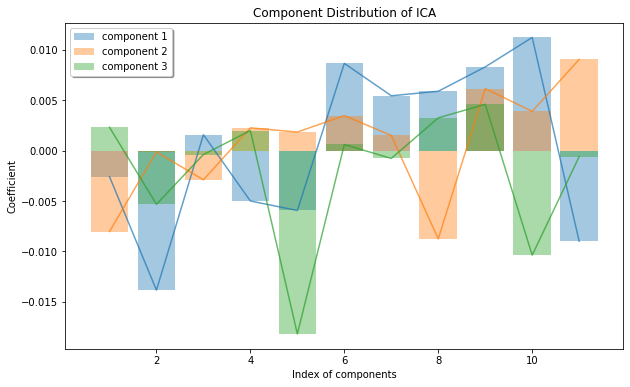

In [72]:
# components_
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Component Distribution of " + name)
g.set_ylabel('Coefficient')
g.set_xlabel('Index of components')
for i in range(3):
    g.bar(nums_, components[i, :], label="component " + str(i+1), alpha=0.4)
    g.plot(nums_, components[i, :], alpha=0.7)
    g.legend(shadow=True, fancybox=True)

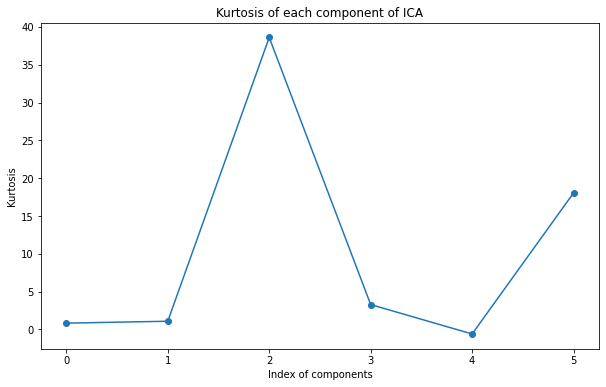

In [73]:
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title(specific_metric + " of each component of " + name)
g.set_ylabel(specific_metric)
g.set_xlabel('Index of components')
g.plot(kurtosises, marker='o')
# g.legend(shadow=True, fancybox=True)

# RP

In [74]:
# variables to change
name = 'RP'
def inverse_transform_rp(rp, X_transformed, X_train):
    tmp = X_transformed.dot(rp.components_)
    return tmp + np.array(np.mean(X_train, axis=0)).reshape(11, 1).T

losses_RP = []
metr = []
times_RP = []
estimators_RP = []
for i in range(1, len(X.columns)+1):
    rp = RP(i)
    t0 = time()
    rp.fit(X)
    fit_time = time() - t0
    times_RP.append(fit_time)
    X_transformed = rp.transform(X)
    X_reconstructed = inverse_transform_rp(rp, X_transformed, X)
    loss = np.sum((X - X_reconstructed) ** 2, axis=1).mean()
    losses_RP.append(loss)
    estimators_RP.append(rp)

In [88]:
losses_RP

[230.86799179356098,
 33.39390011388267,
 17.13839362814273,
 41.82105144949328,
 25.79587221062079,
 21.529625215198198,
 17.805499323085243,
 9.179736498918812,
 22.343485852287635,
 5.73053201780688,
 22.109426614648378]

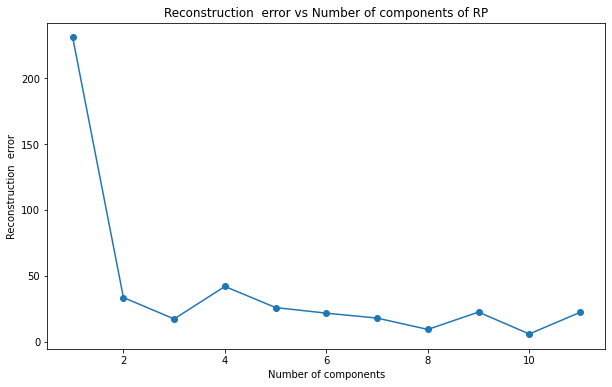

In [75]:
# recon error
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Reconstruction  error vs Number of components of " + name)
g.set_ylabel('Reconstruction  error')
g.set_xlabel('Number of components')
g.plot(nums, losses_RP, marker='o')
# g.legend(shadow=True, fancybox=True)

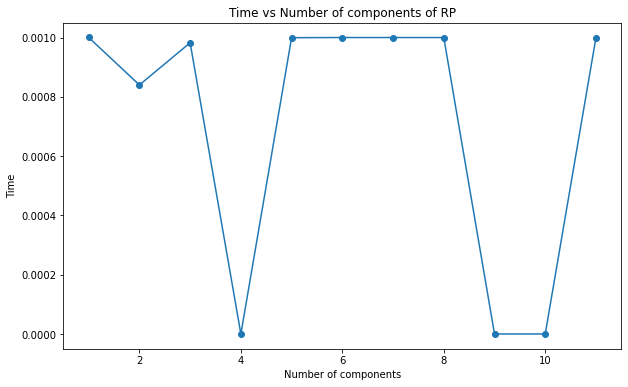

In [76]:
# time
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Time vs Number of components of " + name)
g.set_ylabel('Time')
g.set_xlabel('Number of components')
g.plot(nums, times_RP, marker='o')
# g.legend(shadow=True, fancybox=True)

In [77]:
best_n_idx = 5 - 1
nums_ = range(1, len(X.columns)+1)
rp = estimators_RP[best_n_idx]
components = rp.components_
components.shape

(5, 11)

Text(0.5, 1.0, 'Histogram of the flattened transformation matrix')

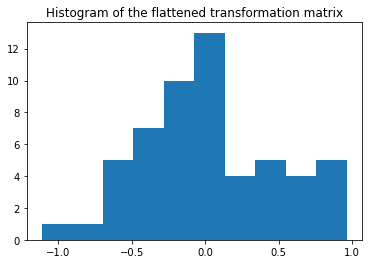

In [78]:
plt.hist(components.flatten())
plt.title('Histogram of the flattened transformation matrix')

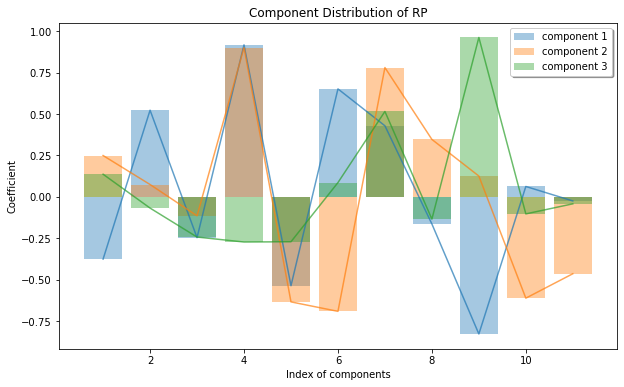

In [79]:
# components_
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Component Distribution of " + name)
g.set_ylabel('Coefficient')
g.set_xlabel('Index of components')
for i in range(3):
    g.bar(nums_, components[i, :], label="component " + str(i+1), alpha=0.4)
    g.plot(nums_, components[i, :], alpha=0.7)
    g.legend(shadow=True, fancybox=True)

# FA

In [80]:
name = 'FA'
def inverse_transform_rp(rp, X_transformed, X_train):
    tmp = X_transformed.dot(rp.components_)
    outcome = tmp + np.array(np.mean(X_train, axis=0)).reshape(11, 1).T
    return outcome

losses_FA = []
times_FA = []
estimators_FA = []
for i in range(1, len(X.columns)+1):
    fa = FA(i)
    t0 = time()
    fa.fit(X)
    fit_time = time() - t0
    times_FA.append(fit_time)
    X_transformed = fa.transform(X)
    X_reconstructed = inverse_transform_rp(fa, X_transformed, X)
    loss = np.sum((X - X_reconstructed) ** 2, axis=1).mean()
    losses_FA.append(loss)
    estimators_FA.append(fa)

In [81]:
losses_FA

[8.309151625779181,
 6.687848547812479,
 5.122090923911355,
 4.233879633428456,
 3.727401011017473,
 2.522109192775271,
 1.7239815018553348,
 1.227124465220413,
 0.8623101876173,
 0.7897821259958065,
 3.9344437301981623]

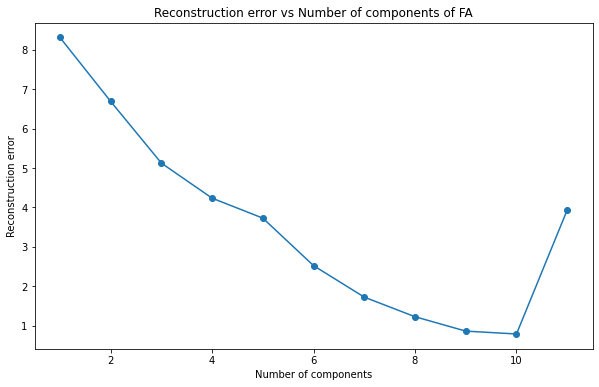

In [82]:
# recon error
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Reconstruction error vs Number of components of " + name)
g.set_ylabel('Reconstruction error')
g.set_xlabel('Number of components')
g.plot(nums, losses_FA, marker='o')
# g.legend(shadow=True, fancybox=True)

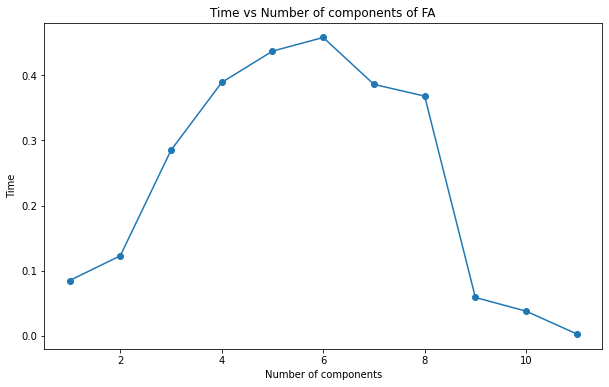

In [83]:
# time
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Time vs Number of components of " + name)
g.set_ylabel('Time')
g.set_xlabel('Number of components')
g.plot(nums, times_FA, marker='o')
# g.legend(shadow=True, fancybox=True)

In [84]:
best_n_idx = 10 - 1
nums_ = range(1, len(X.columns)+1)
fa = estimators_FA[best_n_idx]
components = fa.components_
components.shape

(10, 11)

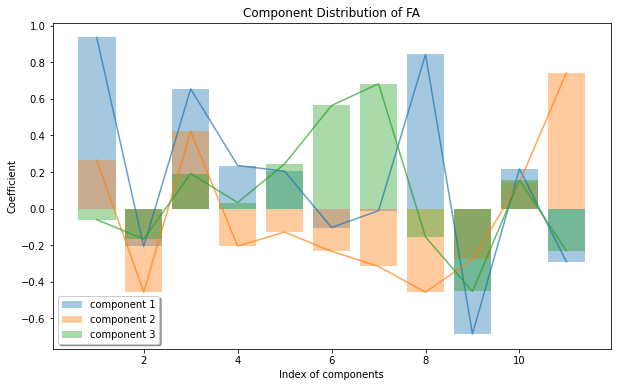

In [85]:
# components_
fig, g = plt.subplots(1, 1, figsize=size)
g.set_title("Component Distribution of " + name)
g.set_ylabel('Coefficient')
g.set_xlabel('Index of components')
for i in range(3):
    g.bar(nums_, components[i, :], label="component " + str(i+1), alpha=0.4)
    g.plot(nums_, components[i, :], alpha=0.7)
    g.legend(shadow=True, fancybox=True)